# Titanic 

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns 

<h1><b><font color='green'>Describe data</font></b></h1>

In [141]:
data_train = pd.read_csv('data/train.csv')
data_train.head()
num_cols = ['Age', 'Fare']
cat_cols = ['Sex', 'SibSp', 'Parch', 'Embarked', 'Survived','Pclass']

In [142]:
print('size:', data_train.shape)
print('random rows:')
a = np.random.randint(891)
data_train.iloc[a:a+5]

size: (891, 12)
random rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.0,0,2,C.A. 31921,26.2500,NaN,S
238,239,0,2,"Pengelly, Mr. Frederick William",male,19.0,0,0,28665,10.5000,NaN,S
239,240,0,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.2750,NaN,S
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q


In [143]:
data_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [144]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### null value

In [145]:
data_train.replace(" ", np.nan, inplace=True)
data_train.replace(" ", np.nan, inplace=True)
data_train = data_train.replace('?', np.nan)
none_data = data_train.isna().sum()
none_data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [146]:
data_train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [147]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<div style="border-radius:10px;border:blue solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
<b><h1><span style='color:#85BB65'></span> Understanding Features:</h1></b>
Dataset providing information about passengers who were aboard the Titanic, including details about their demographics, ticket information, cabin location, and survival status. Here's an explanation of the columns in the Titanic dataset:
<br>
<li><b>PassengerId</b>: A unique identifier for each passenger.</li>
<li><b>Survived</b>: Indicates whether the passenger survived (1) or did not survive (0).</li>
<li><b>Pclass</b>: The passenger's class of travel:</li>
<b>1</b> = 1st class, <b>2</b> = 2nd class, <b>3</b> = 3rd class,
<li><b>Name</b>: The name of the passenger.</li>
<li><b>Sex</b>: The gender of the passenger.</li>
<li><b>Age</b>: The age of the passenger. This column may have missing values.</li>
<li><b>SibSp</b>: The number of siblings or spouses traveling with the passenger.</li>
<li><b>Parch</b>: The number of parents or children traveling with the passenger.</li>
<li><b>Ticket</b>: The ticket number.</li>
<li><b>Fare</b>: The fare paid by the passenger.</li>
<li><b>Cabin</b>: The cabin number where the passenger stayed. This column may have missing values.</li>
<li><b>Embarked</b>: The port at which the passenger boarded the ship:</li>
C = <b>Cherbourg</b>, a port in France, Q = <b>Queenstown</b>, a port in Ireland, S = <b>Southampton</b>, a port in England

численные признаки:  ['Age', 'Fare']


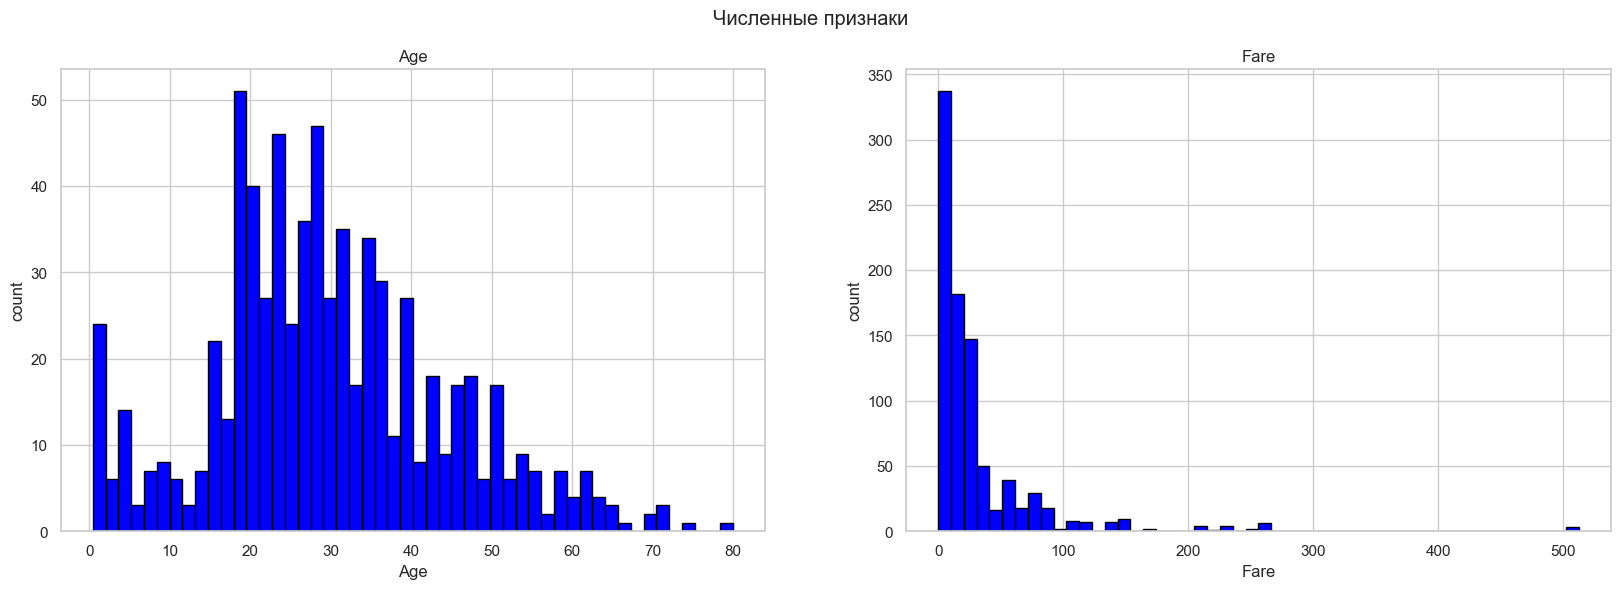

In [148]:
import matplotlib.pyplot as plt
print('численные признаки: ',num_cols)
fig, axes = plt.subplots(1, len(num_cols), figsize=(20, 6), dpi=100)
fig.suptitle('Численные признаки')

for i, name_col in enumerate(num_cols):
    data_train[name_col].hist(ax=axes[i], color = 'blue', edgecolor = 'black', bins = int(50)) # изменять bins для детализации графиков
    axes[i].set_title(name_col)
    axes[i].set_xlabel(name_col)
    axes[i].set_ylabel('count')

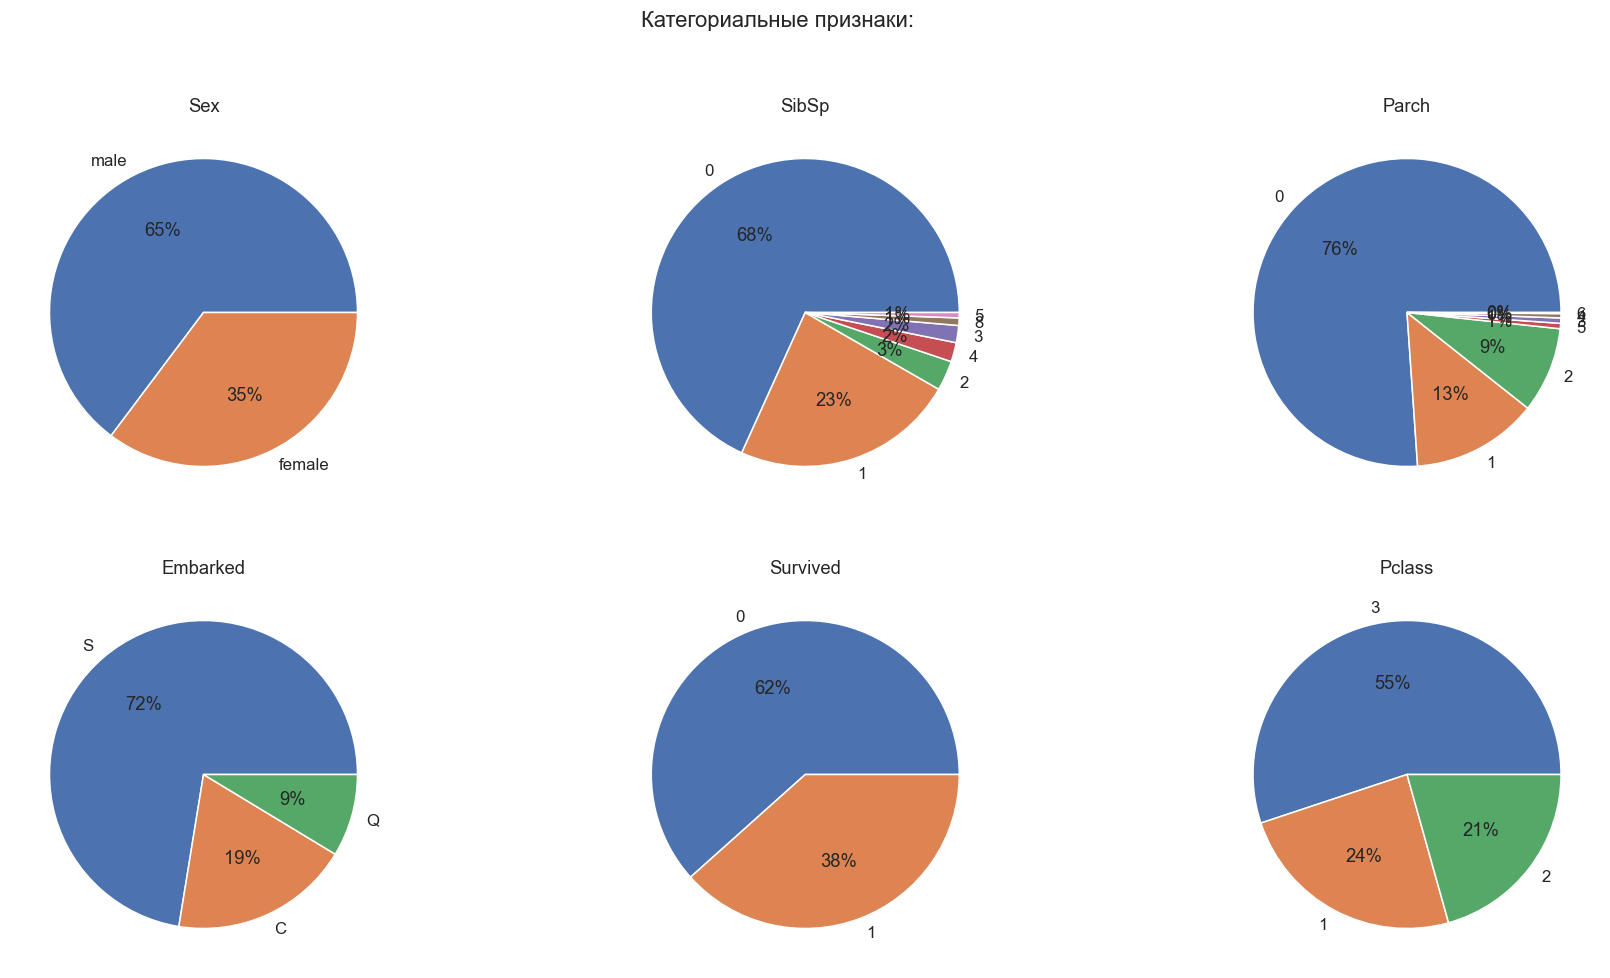

In [149]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10), dpi=110)
fig.suptitle('Категориальные признаки:')

for i, name_col in enumerate(cat_cols):
    values = data_train[name_col].value_counts()

    axes[i//3, i%3].pie(x = values, autopct='%.0f%%', labels=values.index)
    axes[i//3, i%3].set_title(name_col)

array([[<AxesSubplot: title={'center': 'Survived'}>,
        <AxesSubplot: title={'center': 'Pclass'}>],
       [<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'SibSp'}>],
       [<AxesSubplot: title={'center': 'Parch'}>,
        <AxesSubplot: title={'center': 'Fare'}>]], dtype=object)

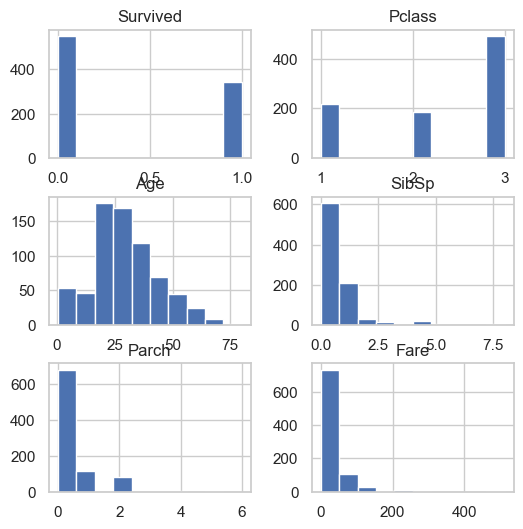

In [150]:
data_train.iloc[:,1:].hist(figsize= (6,6))

In [151]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h1><b><font color='green'>Data Clean</font></b></h1>

In [152]:
# checking Missing values in data:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h1><b><font color='orange'>how fill None?</font></b></h1>

### Age

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

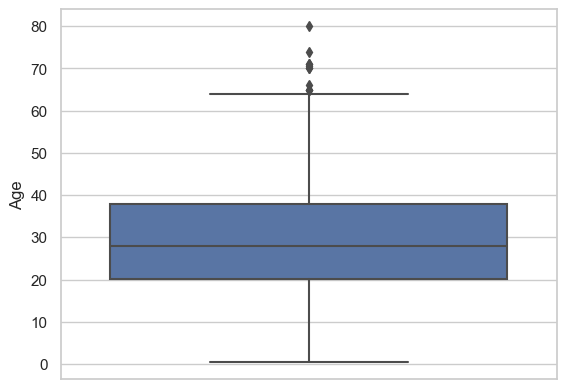

In [153]:
sns.boxplot(data=data_train,y='Age')
data_train['Age'].describe()

In [154]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<p>As it a passenger data including titles like<span style = 'background-color:#85BB65'><b>"Mr.", "Mrs.", "Miss", "Master", etc.,</b></span>I'm using this information to estimate ages. People with similar titles might have similar age distributions. Calculating the <span style = 'color : #F05B02'><b>median age</b></span> for each title and I use it to fill in missing values.

In [155]:
title = [i.split(',')[1].split('.')[0].strip() for i in data_train['Name']]
data_train['title'] = pd.Series(title)
data_train['title'].head()

value_counts = data_train['title'].value_counts()

<AxesSubplot: >

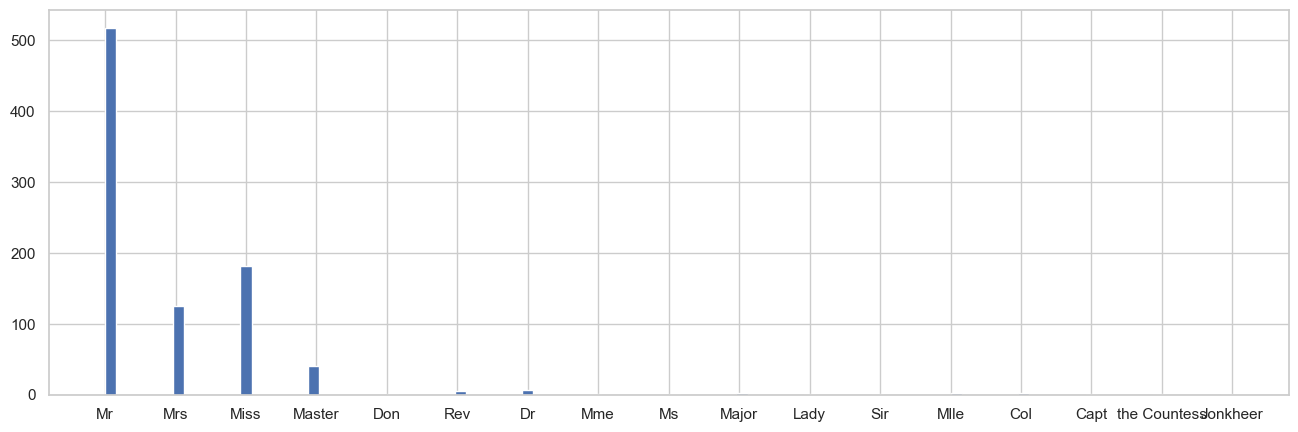

In [156]:
data_train['title'].hist(figsize= (16,5), bins=100)

<div style="border-radius:10px;border:blue solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
<ul>
<li><b>Mr:</b> Used to address adult men, regardless of marital status.</li>
<li><b>Mrs:</b> Used to address married women.</li>
<li><b>Miss:</b> Used to address unmarried women.</li>
<li><b>Rev:</b> Used for clergy members, especially in Christian denominations.</li>
<li><b>Ms:</b> A more neutral title that can be used for women regardless of marital status.</li>
<li><b>Dr.:</b> Used for individuals who hold a doctorate degree, such as medical doctors or PhD holders.</li>
<li><b>Lady:</b> A title of nobility used to address women of high rank or aristocratic status.</li>
<li><b>Master:</b> A title used for young boys, typically under the age of 18.</li>
<li><b>Don:</b> An honorific title used in Spanish and Italian cultures, often used to show respect for a male individual, particularly one with authority or expertise.</li>
<li><b>Mme (Madame):</b> A French title used to address a married woman. Similar to "Mrs." in English.</li>
<li><b>Ms.:</b> A neutral title that can be used for women regardless of marital status. It does not indicate whether a woman is married or not.</li>
<li><b>Major:</b> A military rank or title, usually above Captain and below Lieutenant Colonel.</li>
<li><b>Sir:</b> A polite and respectful form of address for a man. It can be used as a title of honor in various contexts.</li>
<li><b>Mlle (Mademoiselle):</b> A French title used to address an unmarried woman. Similar to "Miss" in English.</li>
<li><b>Col (Colonel):</b> A military rank, typically above Lieutenant Colonel and below Brigadier General.</li>
<li><b>Capt (Captain):</b> A military rank, typically above Lieutenant and below Major.</li>
<li><b>The Countess:</b> A title of nobility for a woman who holds the rank of Count or is married to a Count.</li>
</ul>
 </div>

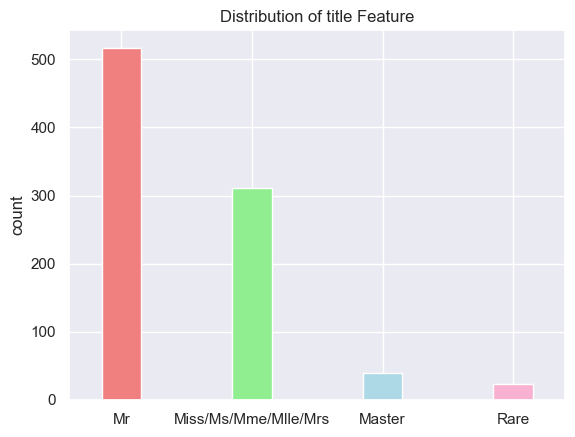

In [157]:
data_train["title"] = data_train["title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data_train['title'] = data_train['title'].replace(['Miss','Ms','Mme','Mlle','Mrs'],'Miss/Ms/Mme/Mlle/Mrs')
sns.set_theme(style="darkgrid")
custom_palette = ["#F08080", "#90EE90", "#ADD8E6", "#F8B1D0"]
data_train['title'].value_counts().plot(kind='bar',color=custom_palette,width=0.3)
plt.title('Distribution of title Feature')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('count')
plt.show()

In [158]:
data_train.loc[(data_train['title'] == 'Mr') & (data_train['Age'].isnull()), 'Age'] = data_train[data_train['title'] == 'Mr']['Age'].median()
data_train.loc[(data_train['title'] == 'Miss/Ms/Mme/Mlle/Mrs') & (data_train['Age'].isnull()), 'Age'] = data_train[data_train['title'] == 'Miss/Ms/Mme/Mlle/Mrs']['Age'].median()
data_train.loc[(data_train['title'] == 'Master') & (data_train['Age'].isnull()), 'Age'] = data_train[data_train['title'] == 'Master']['Age'].median()
data_train.loc[(data_train['title'] == 'Rare') & (data_train['Age'].isnull()), 'Age'] = data_train[data_train['title'] == 'Rare']['Age'].median()

<AxesSubplot: >

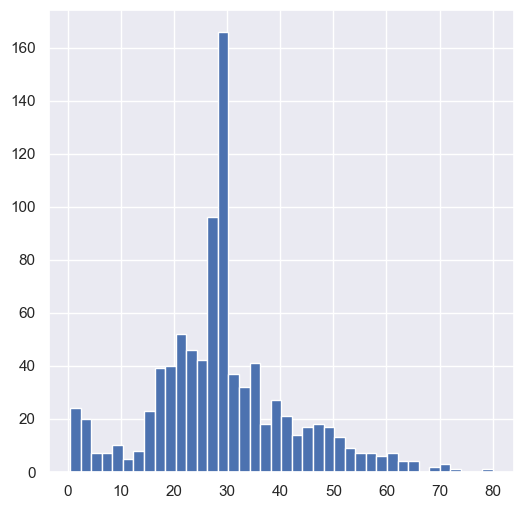

In [159]:
data_train['Age'].hist(figsize= (6,6), bins=40)

In [160]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
title            0
dtype: int64

### Cabin

<li><b>Cabin</b>: The cabin number where the passenger stayed</li>


In [161]:
data_train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [162]:
print('Fare with respect to Passenger class:')
print(data_train.loc[data_train['Pclass'] == 1]['Fare'].describe())
print('='*25)
print(data_train.loc[data_train['Pclass'] == 2]['Fare'].describe())
print('='*25)
print(data_train.loc[data_train['Pclass'] == 3]['Fare'].describe())

Fare with respect to Passenger class:
count    216.000000
mean      84.154687
std       78.380373
min        0.000000
25%       30.923950
50%       60.287500
75%       93.500000
max      512.329200
Name: Fare, dtype: float64
count    184.000000
mean      20.662183
std       13.417399
min        0.000000
25%       13.000000
50%       14.250000
75%       26.000000
max       73.500000
Name: Fare, dtype: float64
count    491.000000
mean      13.675550
std       11.778142
min        0.000000
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: Fare, dtype: float64


In [163]:
p1_survival = data_train[(data_train['Pclass'] == 1)]
p2_survival = data_train[(data_train['Pclass'] == 2)]
p3_survival = data_train[(data_train['Pclass'] == 3)]
print(f'1 class:')
print(p1_survival['Survived'].value_counts())
print(f'2 class:')
print(p2_survival['Survived'].value_counts())
print(f'3 class:')
print(p3_survival['Survived'].value_counts())


1 class:
1    136
0     80
Name: Survived, dtype: int64
2 class:
0    97
1    87
Name: Survived, dtype: int64
3 class:
0    372
1    119
Name: Survived, dtype: int64


#### будем эвристически выбирать из этих данных о кабинах 

выберем похожие значения из списков ниже и заполним пропуски для первого класса

## class 1

In [164]:
print(list(p1_survival[p1_survival['Survived'] == 0]['Cabin']))

['E46', 'C23 C25 C27', nan, nan, nan, 'B30', 'C83', nan, nan, 'E31', 'A5', 'D26', 'C110', 'B58 B60', 'D26', 'C123', 'B86', nan, nan, 'B19', 'A7', 'C49', 'A32', 'C78', 'C87', 'E67', 'B94', nan, 'C118', 'A19', nan, 'C22 C26', 'C124', 'C91', 'C2', 'T', 'C128', nan, 'C82', 'E44', 'C23 C25 C27', 'C111', 'E38', 'E63', nan, 'A14', 'B37', 'C30', nan, 'C22 C26', 'C65', 'D46', 'C95', 'B38', 'C86', nan, nan, nan, 'A10', nan, 'D50', nan, 'D48', 'E58', 'B71', nan, 'C68', 'C124', 'C46', 'B22', 'D30', nan, 'D6', 'B82 B84', nan, 'A36', 'B102', nan, 'A24', 'B51 B53 B55']


In [165]:
print(list(p1_survival[p1_survival['Survived'] == 1]['Cabin']))

['C85', 'C123', 'C103', 'A6', 'B78', 'D33', 'C52', 'B28', 'C23 C25 C27', 'D10 D12', 'D47', 'C2', 'E33', nan, 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C83', 'D35', nan, 'B77', nan, 'C125', 'C99', 'D7', nan, 'B49', 'C106', 'B58 B60', 'C22 C26', nan, 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', nan, 'E40', 'C23 C25 C27', 'E33', 'D37', 'B35', 'E50', nan, nan, nan, 'B96 B98', 'D36', 'C78', 'C52', 'B96 B98', 'A34', nan, 'C104', 'C92', 'D21', 'E12', 'B49', 'C93', 'D20', 'B79', nan, 'E25', nan, 'B73', 'B18', nan, 'B39', 'B22', 'C70', 'A16', 'E67', 'C101', 'E25', 'E44', 'C68', 'E68', 'B41', 'D20', 'A20', nan, nan, 'C125', 'D19', 'D9', 'A23', 'B50', 'B35', 'D33', 'A26', nan, 'C126', 'B51 B53 B55', 'D49', 'B5', 'B20', 'C62 C64', 'E24', 'E24', nan, 'C90', 'C126', 'C45', 'E8', 'B5', 'B101', 'D45', 'B57 B59 B63 B66', 'B77', 'B96 B98', 'D11', 'B3', 'B20', 'D17', 'B96 B98', 'E8', 'B69', 'B28', 'E49', 'C47', nan, 'C92', 'D28', nan, 'E17', 'D17', 'D35', 'C50', 'B42', 'C148']


In [166]:
p1_died_null_cabin = p1_survival[(p1_survival['Survived'] == 0) & (p1_survival['Cabin'].isnull())]
for i in p1_died_null_cabin.index.to_list():
    if i<=5:
        data_train.loc[i,'Cabin'] = 'C30'
    elif (i>5) & (i<=10):
        data_train.loc[i,'Cabin'] = 'C110'
    elif (i>10) & (i<=15):
        data_train.loc[i,'Cabin'] = 'B94'
    else:
        data_train.loc[i,'Cabin'] = 'E44'

In [167]:
# Imputing Nan values equally distributed with cabins based on pclass=1,High Fare and 1st class passenger cabins who were alive in 1st class:
p1_alive_null_cabin = p1_survival[(p1_survival['Survived'] ==1) & (p1_survival['Cabin'].isnull())]
for i in p1_alive_null_cabin.index.to_list():
    if i>=5:
        data_train.loc[i,'Cabin'] = 'B96 B98'
    elif (i>5) & (i<=10):
        data_train.loc[i,'Cabin'] = 'E40'
    elif (i>10) & (i<=15):
        data_train.loc[i,'Cabin'] = 'E34'
    else:
        data_train.loc[i,'Cabin'] = 'D30'

## class 2

In [168]:
print(p2_survival[p2_survival['Survived'] == 0]['Cabin'].value_counts())
print(p2_survival[p2_survival['Survived'] == 1]['Cabin'].value_counts())

F2     1
D      1
E77    1
Name: Cabin, dtype: int64
F33     3
E101    3
F4      2
F2      2
D       2
D56     1
Name: Cabin, dtype: int64


In [169]:
print(list(p2_survival[p2_survival['Survived'] == 0]['Cabin']))

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'F2', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'D', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'E77', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [170]:
print(list(p2_survival[p2_survival['Survived'] == 1]['Cabin']))

[nan, nan, nan, 'D56', nan, nan, nan, nan, 'F33', nan, nan, nan, 'E101', nan, nan, 'F4', nan, 'F2', nan, nan, nan, nan, nan, nan, nan, 'E101', nan, nan, nan, 'D', 'F2', 'F33', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'D', nan, 'F33', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'F4', nan, nan, nan, nan, nan, 'E101', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [171]:
p2_died_null_cabin =p2_survival[(p2_survival['Survived'] == 0) & (p2_survival['Cabin'].isnull())]
for i in p2_died_null_cabin.index.to_list():
    if i<=61:
        data_train.loc[i,'Cabin'] = 'F2'
    elif (i>61) & (i<=122):
        data_train.loc[i,'Cabin'] = 'D' # потому что по алфавите f->d->e
    elif i<=122:
        data_train.loc[i,'Cabin'] = 'E77'

In [172]:
p2_died_null_cabin =p2_survival[(p2_survival['Survived'] == 1) & (p2_survival['Cabin'].isnull())]
for i in p2_died_null_cabin.index.to_list():
    if i<=15:
        data_train.loc[i,'Cabin'] = 'F33'
    elif (i>15) & (i<=30):
        data_train.loc[i,'Cabin'] = 'E101'
    elif (i>30) & (i<=40):
         data_train.loc[i,'Cabin'] = 'F4'
    elif (i>40) & (i<=50):
         data_train.loc[i,'Cabin'] = 'F2'
    elif (i>50) & (i<=60):
         data_train.loc[i,'Cabin'] = 'D'


### 3 class

In [173]:
print(p3_survival['Survived'].value_counts())

0    372
1    119
Name: Survived, dtype: int64


In [174]:
print(p3_survival[p3_survival['Survived'] == 0]['Cabin'].value_counts())
print(p3_survival[p3_survival['Survived'] == 1]['Cabin'].value_counts())

F G73    2
G6       2
F G63    1
F38      1
Name: Cabin, dtype: int64
G6       2
E121     2
F E69    1
E10      1
Name: Cabin, dtype: int64


In [175]:
print(list(p3_survival[p3_survival['Survived'] == 0]['Cabin']))

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'F G73', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'G6', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'G6', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

In [176]:
#p3_died_null_cabin = p3_survival[(p3_survival['Survived'] == 0) & (p3_survival['Cabin'].isnull())]
#for i in p3_died_null_cabin.index.to_list():
#    if i<=122:
#        data_train.loc[i,"Cabin"]="G6"
#    elif (i>122) & (i<=244):
#        data_train.loc[i,'Cabin']='G6'
#    elif (i>244) & (i<=305):
#        data_train.loc[i,'Cabin']='F G63'
#    else:
#        data_train.loc[i,'Cabin']='F38'

In [177]:
print(list(p3_survival[p3_survival['Survived'] == 1]['Cabin']))

[nan, nan, 'G6', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'F E69', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'G6', nan, nan, 'E10', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'E121', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'E121', nan, nan, nan, nan, nan, nan, nan]


In [178]:
#p3_alive_null_cabin = p3_survival[(p3_survival['Survived'] == 1) & (p3_survival['Cabin'].isnull())]
#for i in p3_alive_null_cabin.index.to_list():
#    if i<=38:
#        data_train.loc[i,"Cabin"]="G7"
#    elif (i>38) & (i<=76):
#        data_train.loc[i,'Cabin']='E121'
#    elif (i>76) & (i<=95):
#        data_train.loc[i,'Cabin']='F E69'
#    else:
#        data_train.loc[i,'Cabin']='E10'

In [179]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          631
Embarked         2
title            0
dtype: int64

In [180]:
data_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [181]:
data_train['Embarked'].replace(np.nan,'Q',inplace=True)

In [182]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          631
Embarked         0
title            0
dtype: int64

In [183]:
# дубликаты
data_train.duplicated().sum()

0

<h1><b><font color='green'>Graphics</font></b></h1>

Text(0.5, 1.0, '6. Distribution of survival with respect to Pclass')

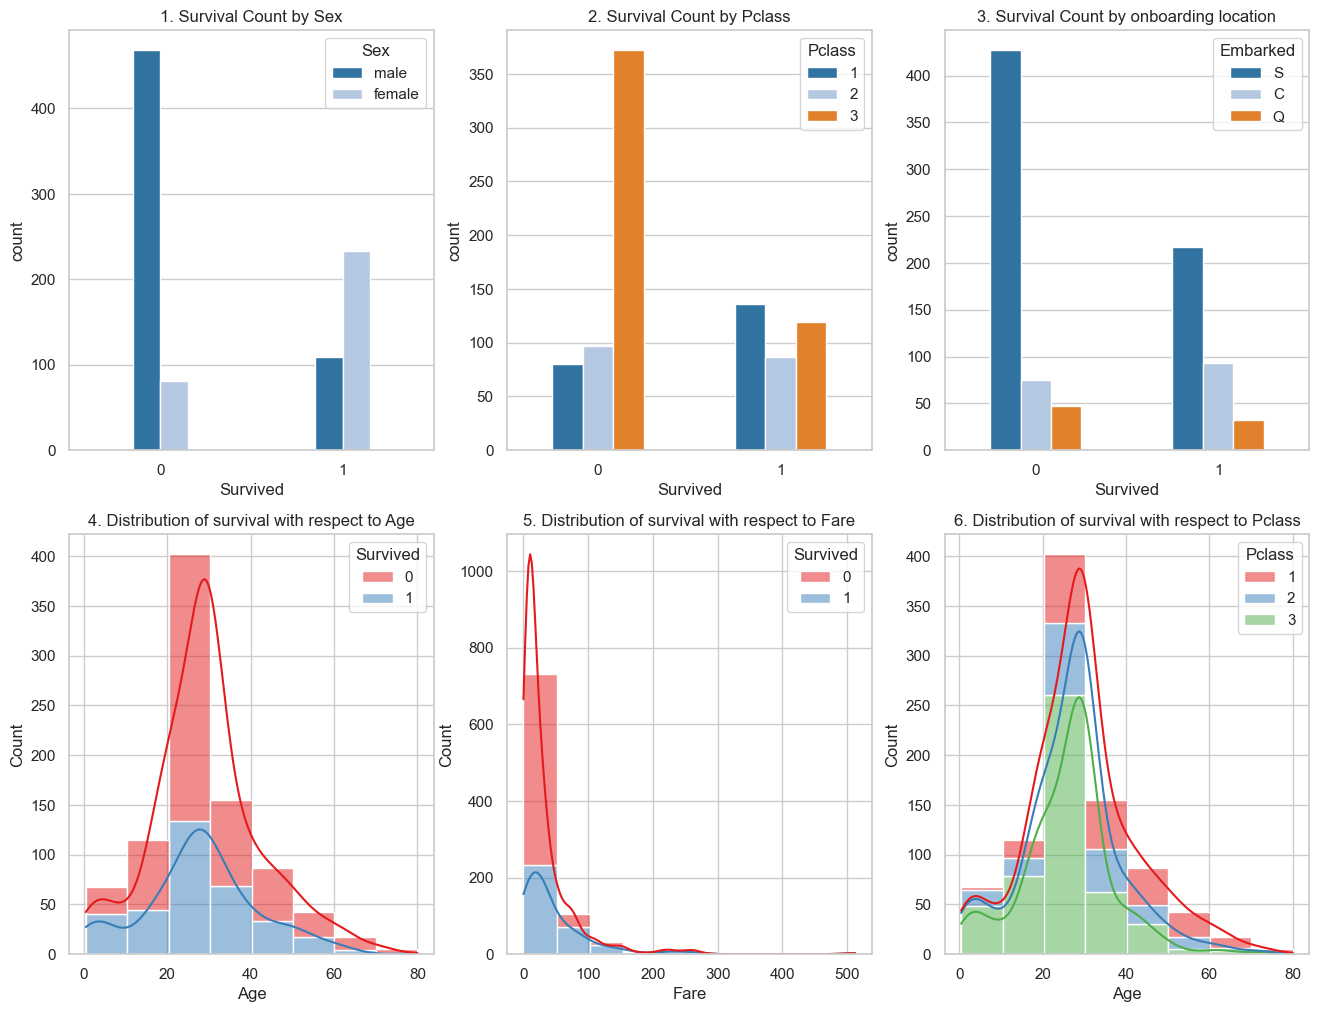

In [184]:
sns.set(style="whitegrid") 
plt.figure(figsize=(16,12))

# sex vs survival rate:
plt.subplot(2,3,1)
sns.countplot(data_train,x='Survived',hue='Sex',palette='tab20',width=0.3)
plt.title('1. Survival Count by Sex')

# Passenger class vs survival rate:
plt.subplot(2,3,2)
sns.countplot(x="Survived", hue="Pclass", data=data_train, palette="tab20",width=0.5)
plt.title('2. Survival Count by Pclass')

# Siblings vs survival rate:
plt.subplot(2,3,3)
sns.countplot(x="Survived", hue="Embarked", data=data_train, palette="tab20",width=0.5)
plt.title('3. Survival Count by onboarding location')

# Onboarding location vs survival rate:
plt.subplot(2,3,4)
sns.histplot(data=data_train,x='Age',hue='Survived',bins=8,multiple='stack',kde=True, palette='Set1')
plt.title('4. Distribution of survival with respect to Age')

# Age vs survival rate:
plt.subplot(2,3,5)
sns.histplot(data=data_train, x="Fare", hue="Survived", bins=10,multiple='stack',kde=True,palette='Set1')
plt.title('5. Distribution of survival with respect to Fare')

# Ticket Fare vs survival rate:
plt.subplot(2,3,6)
sns.histplot(data_train, x='Age', hue='Pclass',bins=8,multiple='stack',kde=True,palette='Set1')
plt.title('6. Distribution of survival with respect to Pclass')

/Users/kodin/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kodin/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kodin/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kodin/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 19.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kodin/.pyenv/v

/Users/kodin/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kodin/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kodin/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kodin/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kodin/.pyenv/ve

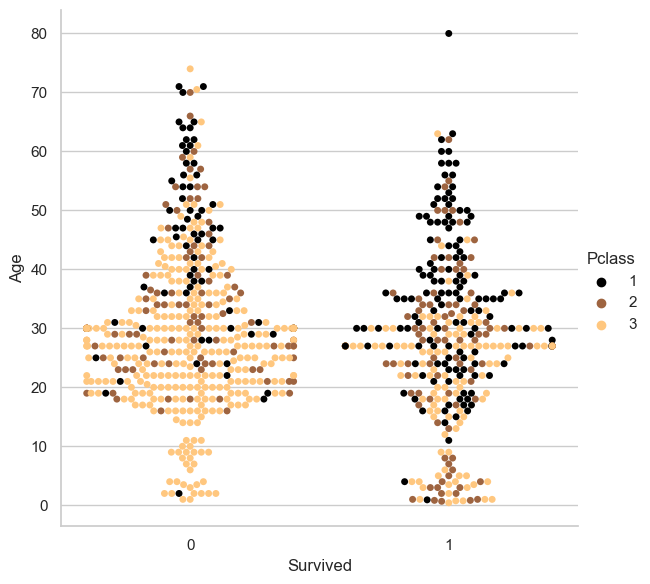

In [185]:
sns.catplot(data_train,x='Survived',y='Age',hue='Pclass',kind='swarm',height=6,palette='copper')

In [186]:
print(data_train['Sex'].value_counts())
print(data_train.loc[data_train.Sex == 'male']['Survived'].value_counts())

male      577
female    314
Name: Sex, dtype: int64
0    468
1    109
Name: Survived, dtype: int64


In [187]:
print(data_train.loc[data_train.Sex == 'female']['Survived'].value_counts())

1    233
0     81
Name: Survived, dtype: int64


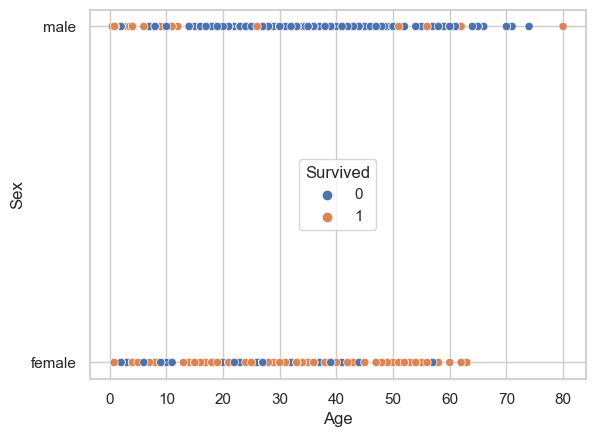

In [188]:
sns.scatterplot(data_train,x='Age',y='Sex',hue='Survived')
plt.legend(loc='center',title='Survived')

<AxesSubplot: xlabel='Fare', ylabel='Pclass'>

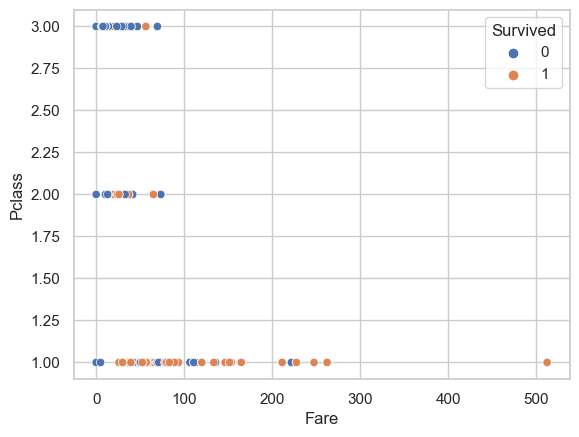

In [189]:
sns.scatterplot(data_train,x='Fare',y='Pclass',hue='Survived')

<AxesSubplot: xlabel='Age', ylabel='Fare'>

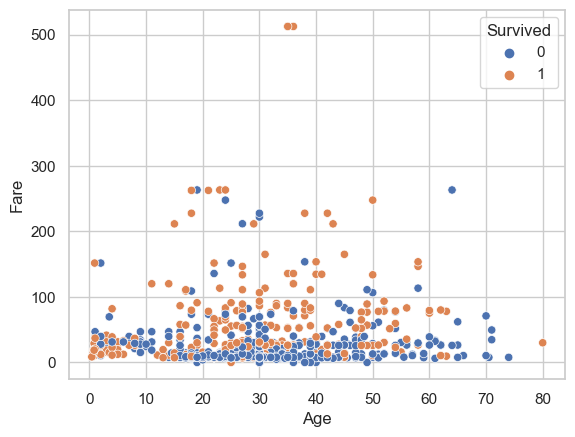

In [190]:
sns.scatterplot(data_train,x='Age',y='Fare',hue='Survived')

In [191]:
#label encoder
column_headers = ['Name','Sex', 'Ticket', 'Cabin', 'Embarked','title']        # categorical columns stored in a variable
le = LabelEncoder()
data_train[column_headers] = data_train[column_headers].apply(le.fit_transform)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0,1
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2,1
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2,1
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2,2


<AxesSubplot: >

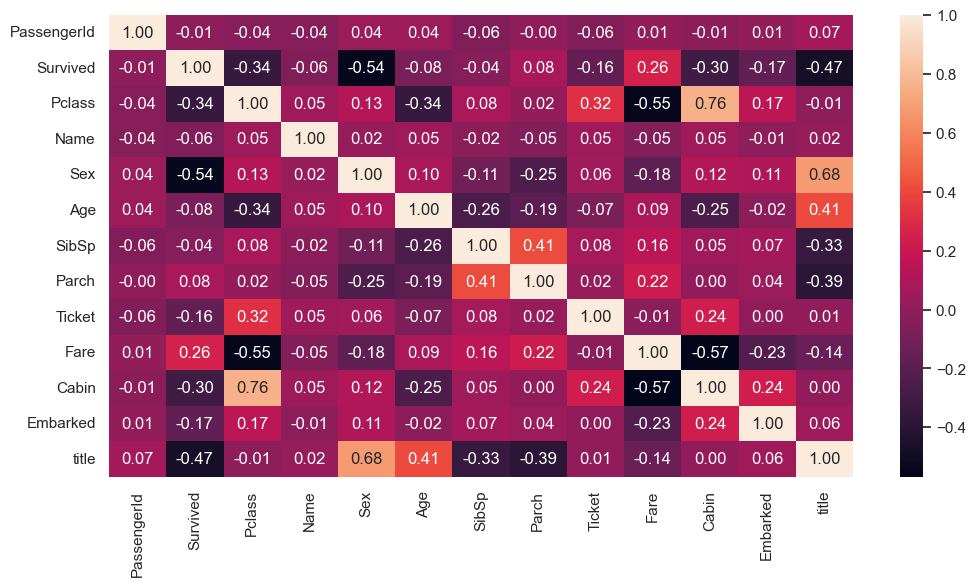

In [192]:
plt.figure(figsize=(12,6))
sns.heatmap(data_train.corr(),annot=True,fmt='.2f')

<h1><b><font color='green'>Predict</font></b></h1>

In [193]:
from sklearn.model_selection import train_test_split
# Data partitioning to build model:
X = data_train.drop('Survived', axis=1)
y = data_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Linear Regression - 0.81

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model_reg = LogisticRegression()
model_reg.fit(X_train, y_train)
y_pred = model_reg.predict(X_test)

/Users/kodin/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [195]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print('='*30)
print("Accuracy:", accuracy)
print('='*30)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7932960893854749
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



### - none

In [196]:
from catboost import CatBoostClassifier

In [197]:
test_df = pd.read_csv('data/test.csv')  

In [198]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64